In [19]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv("/content/Delhi_AirPollution_2015_2023-0.1.csv")
df.head()

,Date,PM2.5,PM10,NO2,CO,SO2,O3
0,2015-01-01,313.22,607.98,36.39,15.20,9.25,41.68
1,2015-01-02,186.18,269.55,32.87,9.54,6.65,29.97
2,2015-01-03,87.18,131.90,30.31,10.61,2.65,19.71
3,2015-01-04,151.84,241.84,36.91,11.54,4.63,25.36
4,2015-01-05,146.60,219.13,34.92,9.20,3.33,23.20


**SOME BASIC PRE-PROCESSING**

In [3]:
# Convert Date column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Create new time-based features
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month
df['day'] = df['Date'].dt.day
df['dayofweek'] = df['Date'].dt.dayofweek

In [6]:
# Check missing values
print(df.isnull().sum())

Date         0
PM2.5        0
PM10         0
NO2          0
CO           0
SO2          0
O3           0
year         0
month        0
day          0
dayofweek    0
dtype: int64


In [7]:
# Quick look at data types
print(df.dtypes)

Date         datetime64[ns]
PM2.5               float64
PM10                float64
NO2                 float64
CO                  float64
SO2                 float64
O3                  float64
year                  int32
month                 int32
day                   int32
dayofweek             int32
dtype: object


In [8]:
df.columns

Index(['Date', 'PM2.5', 'PM10', 'NO2', 'CO', 'SO2', 'O3', 'year', 'month',
       'day', 'dayofweek'],
      dtype='object')

In [9]:
#FOCUSING ON PM2.5 COLUMN FOR NOW

**TESTING FEW OF THE MODELS TO CHOOSE A BETTER AMONG THEM**

In [10]:
#MODEL TRAING

In [11]:
# Define feature columns
feature_cols = ['PM10', 'NO2', 'CO', 'SO2', 'O3', 'year', 'month', 'day', 'dayofweek']

# Input and output
X = df[feature_cols]
y = df['PM2.5']

In [17]:
# Train-test split based on year
train_df = df[df['year'] < 2023]
test_df = df[df['year'] == 2023]

X_train = train_df[feature_cols]
y_train = train_df['PM2.5']

X_test = test_df[feature_cols]
y_test = test_df['PM2.5']

In [22]:
#Feature Scaling

In [20]:
# Initialize scaler
scaler = StandardScaler()

# Fit on training, transform both train and test
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [26]:
# 30% of the data for quick training
from sklearn.model_selection import train_test_split

# Train-Test Split (small sample)
X_small_train, _, y_small_train, _ = train_test_split(
    X_train_scaled, y_train, test_size=0.7, random_state=42
)

In [23]:
#DIFFERNET MODELS TESTED

**1: Linear Regression**

In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
# Train Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_small_train, y_small_train)

# Predict on test set
y_pred_lr = lr_model.predict(X_test_scaled)

# Evaluation
mae_lr = mean_absolute_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
r2_lr = r2_score(y_test, y_pred_lr)

print(f"Linear Regression:\nMAE: {mae_lr:.2f}, RMSE: {rmse_lr:.2f}, R2: {r2_lr:.2f}")

Linear Regression:
MAE: 34.43, RMSE: 41.63, R2: 0.88


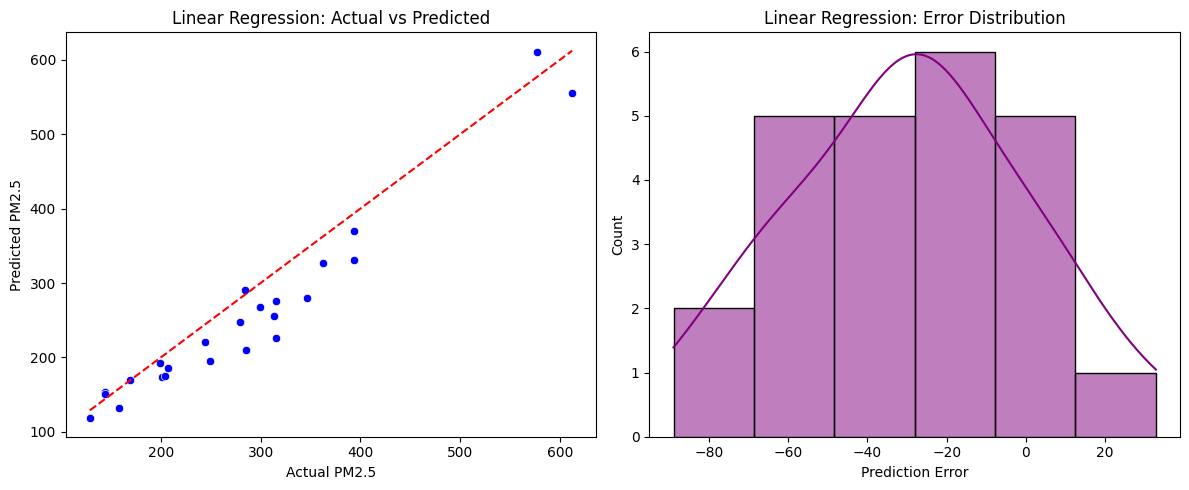

In [31]:
# Plotting True vs Predicted
plt.figure(figsize=(12,5))

# Scatter Plot
plt.subplot(1,2,1)
sns.scatterplot(x=y_test, y=y_pred_lr, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
plt.xlabel('Actual PM2.5')
plt.ylabel('Predicted PM2.5')
plt.title('Linear Regression: Actual vs Predicted')

# Residual Plot
plt.subplot(1,2,2)
sns.histplot(y_pred_lr - y_test, kde=True, color='purple')
plt.xlabel('Prediction Error')
plt.title('Linear Regression: Error Distribution')

plt.tight_layout()
plt.show()

**2: Ridge Regression**

In [33]:
from sklearn.linear_model import Ridge

In [34]:
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_small_train, y_small_train)

y_pred_ridge = ridge_model.predict(X_test_scaled)

mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
rmse_ridge = np.sqrt(mean_squared_error(y_test, y_pred_ridge))
r2_ridge = r2_score(y_test, y_pred_ridge)

print(f"Ridge Regression:\nMAE: {mae_ridge:.2f}, RMSE: {rmse_ridge:.2f}, R2: {r2_ridge:.2f}")

Ridge Regression:
MAE: 34.56, RMSE: 41.80, R2: 0.88


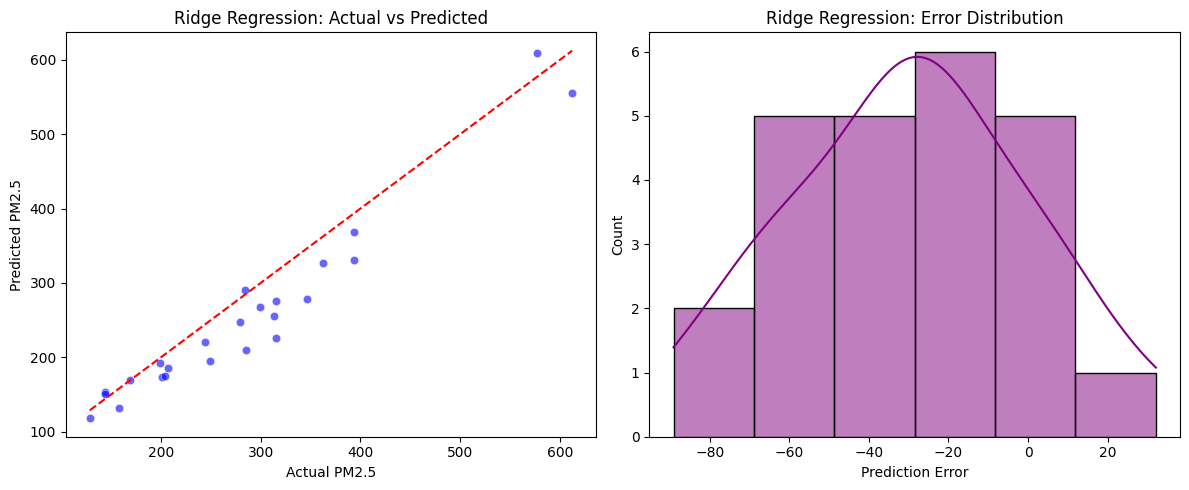

In [35]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.scatterplot(x=y_test, y=y_pred_ridge, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
plt.xlabel('Actual PM2.5')
plt.ylabel('Predicted PM2.5')
plt.title('Ridge Regression: Actual vs Predicted')

plt.subplot(1,2,2)
sns.histplot(y_pred_ridge - y_test, kde=True, color='purple')
plt.xlabel('Prediction Error')
plt.title('Ridge Regression: Error Distribution')

plt.tight_layout()
plt.show()

**3: Decision Tree Regressor**

In [36]:
from sklearn.tree import DecisionTreeRegressor

dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_small_train, y_small_train)

y_pred_dt = dt_model.predict(X_test_scaled)

mae_dt = mean_absolute_error(y_test, y_pred_dt)
rmse_dt = np.sqrt(mean_squared_error(y_test, y_pred_dt))
r2_dt = r2_score(y_test, y_pred_dt)

print(f"Decision Tree:\nMAE: {mae_dt:.2f}, RMSE: {rmse_dt:.2f}, R2: {r2_dt:.2f}")

Decision Tree:
MAE: 31.23, RMSE: 36.26, R2: 0.91


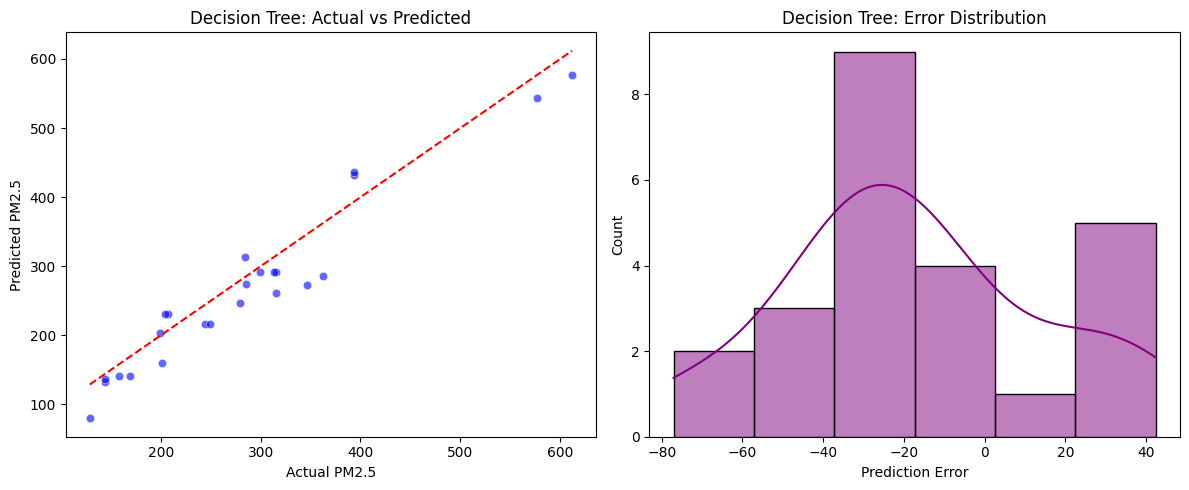

In [37]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.scatterplot(x=y_test, y=y_pred_dt, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
plt.xlabel('Actual PM2.5')
plt.ylabel('Predicted PM2.5')
plt.title('Decision Tree: Actual vs Predicted')

plt.subplot(1,2,2)
sns.histplot(y_pred_dt - y_test, kde=True, color='purple')
plt.xlabel('Prediction Error')
plt.title('Decision Tree: Error Distribution')

plt.tight_layout()
plt.show()

**4: Random Forest Regressor**

In [38]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_small_train, y_small_train)

y_pred_rf = rf_model.predict(X_test_scaled)

mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

In [39]:
print(f"Random Forest:\nMAE: {mae_rf:.2f}, RMSE: {rmse_rf:.2f}, R2: {r2_rf:.2f}")

Random Forest:
MAE: 20.34, RMSE: 24.65, R2: 0.96


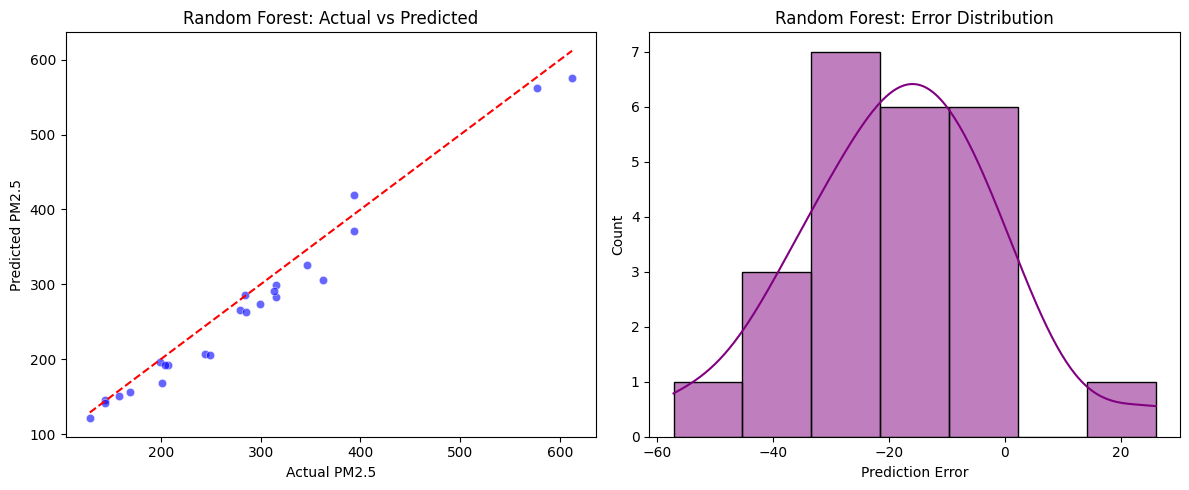

In [40]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.scatterplot(x=y_test, y=y_pred_rf, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
plt.xlabel('Actual PM2.5')
plt.ylabel('Predicted PM2.5')
plt.title('Random Forest: Actual vs Predicted')

plt.subplot(1,2,2)
sns.histplot(y_pred_rf - y_test, kde=True, color='purple')
plt.xlabel('Prediction Error')
plt.title('Random Forest: Error Distribution')

plt.tight_layout()
plt.show()

**5: XGBoost Regressor**

In [41]:
from xgboost import XGBRegressor

xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_model.fit(X_small_train, y_small_train)

y_pred_xgb = xgb_model.predict(X_test_scaled)

mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f"XGBoost:\nMAE: {mae_xgb:.2f}, RMSE: {rmse_xgb:.2f}, R2: {r2_xgb:.2f}")

XGBoost:
MAE: 14.54, RMSE: 18.91, R2: 0.98


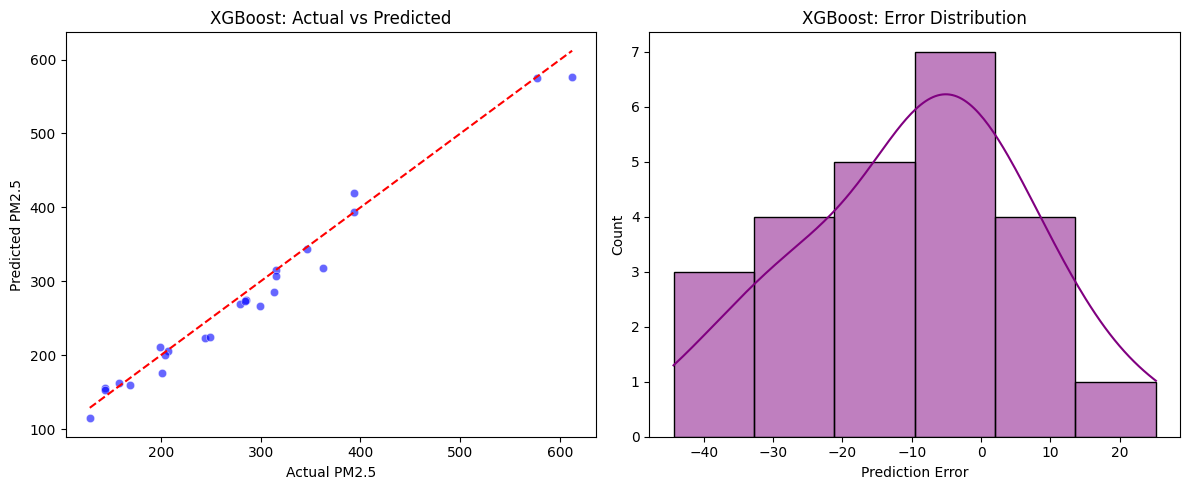

In [42]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.scatterplot(x=y_test, y=y_pred_xgb, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
plt.xlabel('Actual PM2.5')
plt.ylabel('Predicted PM2.5')
plt.title('XGBoost: Actual vs Predicted')

plt.subplot(1,2,2)
sns.histplot(y_pred_xgb - y_test, kde=True, color='purple')
plt.xlabel('Prediction Error')
plt.title('XGBoost: Error Distribution')

plt.tight_layout()
plt.show()

**7: Support Vector Regressor (SVR)**

In [43]:
from sklearn.svm import SVR

svr_model = SVR(kernel='rbf')
svr_model.fit(X_small_train, y_small_train)

y_pred_svr = svr_model.predict(X_test_scaled)

mae_svr = mean_absolute_error(y_test, y_pred_svr)
rmse_svr = np.sqrt(mean_squared_error(y_test, y_pred_svr))
r2_svr = r2_score(y_test, y_pred_svr)

print(f"Support Vector Regressor:\nMAE: {mae_svr:.2f}, RMSE: {rmse_svr:.2f}, R2: {r2_svr:.2f}")

Support Vector Regressor:
MAE: 145.14, RMSE: 184.51, R2: -1.32


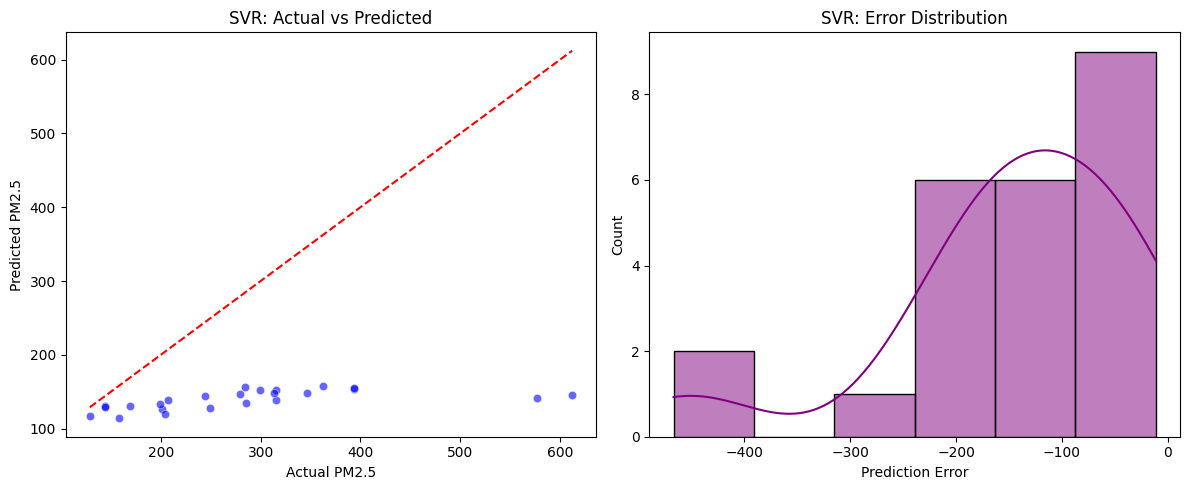

In [44]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.scatterplot(x=y_test, y=y_pred_svr, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
plt.xlabel('Actual PM2.5')
plt.ylabel('Predicted PM2.5')
plt.title('SVR: Actual vs Predicted')

plt.subplot(1,2,2)
sns.histplot(y_pred_svr - y_test, kde=True, color='purple')
plt.xlabel('Prediction Error')
plt.title('SVR: Error Distribution')

plt.tight_layout()
plt.show()

**8: K-Nearest Neighbors (KNN)**

In [45]:
from sklearn.neighbors import KNeighborsRegressor

knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_small_train, y_small_train)

y_pred_knn = knn_model.predict(X_test_scaled)

mae_knn = mean_absolute_error(y_test, y_pred_knn)
rmse_knn = np.sqrt(mean_squared_error(y_test, y_pred_knn))
r2_knn = r2_score(y_test, y_pred_knn)

print(f"K-Nearest Neighbors:\nMAE: {mae_knn:.2f}, RMSE: {rmse_knn:.2f}, R2: {r2_knn:.2f}")

K-Nearest Neighbors:
MAE: 50.14, RMSE: 63.08, R2: 0.73


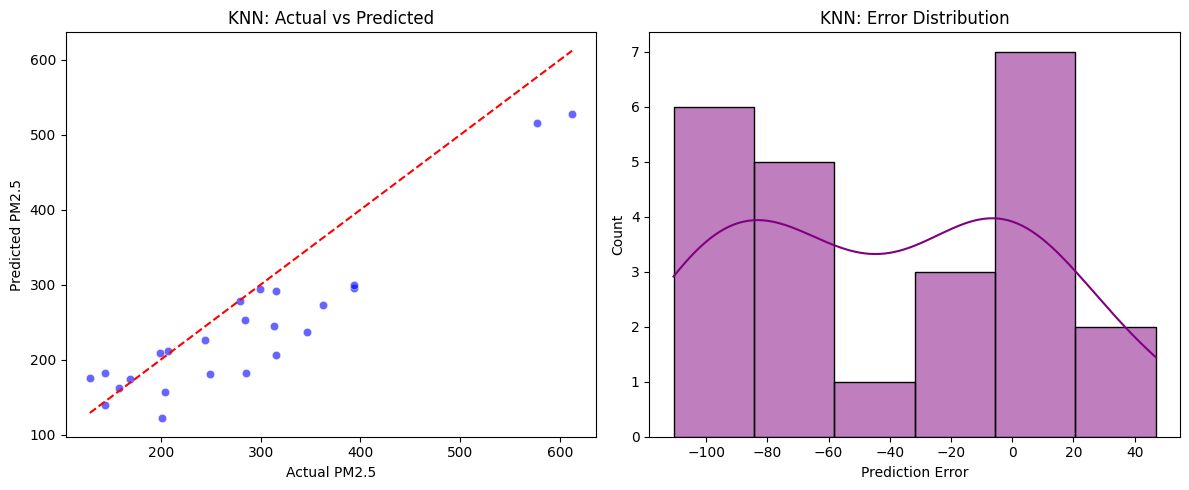

In [46]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.scatterplot(x=y_test, y=y_pred_knn, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
plt.xlabel('Actual PM2.5')
plt.ylabel('Predicted PM2.5')
plt.title('KNN: Actual vs Predicted')

plt.subplot(1,2,2)
sns.histplot(y_pred_knn - y_test, kde=True, color='purple')
plt.xlabel('Prediction Error')
plt.title('KNN: Error Distribution')

plt.tight_layout()
plt.show()

In [47]:
#NOW USING SOME DEEP LEARNING MODELS AS WELL

In [48]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM, Bidirectional

In [49]:
# Normalize X_train and X_test for RNN/LSTM
scaler = MinMaxScaler()
X_train_scaled_nn = scaler.fit_transform(X_train)
X_test_scaled_nn = scaler.transform(X_test)

# Reshape input to 3D for RNN [samples, timesteps, features]
X_train_rnn = X_train_scaled_nn.reshape((X_train_scaled_nn.shape[0], 1, X_train_scaled_nn.shape[1]))
X_test_rnn = X_test_scaled_nn.reshape((X_test_scaled_nn.shape[0], 1, X_test_scaled_nn.shape[1]))

print("X_train_rnn shape:", X_train_rnn.shape)
print("X_test_rnn shape:", X_test_rnn.shape)

X_train_rnn shape: (2776, 1, 9)
X_test_rnn shape: (24, 1, 9)


1: SIMPLE RNN

In [58]:
# RNN Model
rnn_model = Sequential()
rnn_model.add(SimpleRNN(64, activation='relu', input_shape=(X_train_rnn.shape[1], X_train_rnn.shape[2])))
rnn_model.add(Dense(1))

rnn_model.compile(optimizer='adam', loss='mse')

# Train
history_rnn = rnn_model.fit(X_train_rnn, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=0)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [59]:
# Predict
y_pred_rnn = rnn_model.predict(X_test_rnn).flatten()

# Evaluation
mae_rnn = mean_absolute_error(y_test, y_pred_rnn)
rmse_rnn = np.sqrt(mean_squared_error(y_test, y_pred_rnn))
r2_rnn = r2_score(y_test, y_pred_rnn)

print(f"Simple RNN:\nMAE: {mae_rnn:.2f}, RMSE: {rmse_rnn:.2f}, R2: {r2_rnn:.2f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step
Simple RNN:
MAE: 82.26, RMSE: 97.97, R2: 0.35


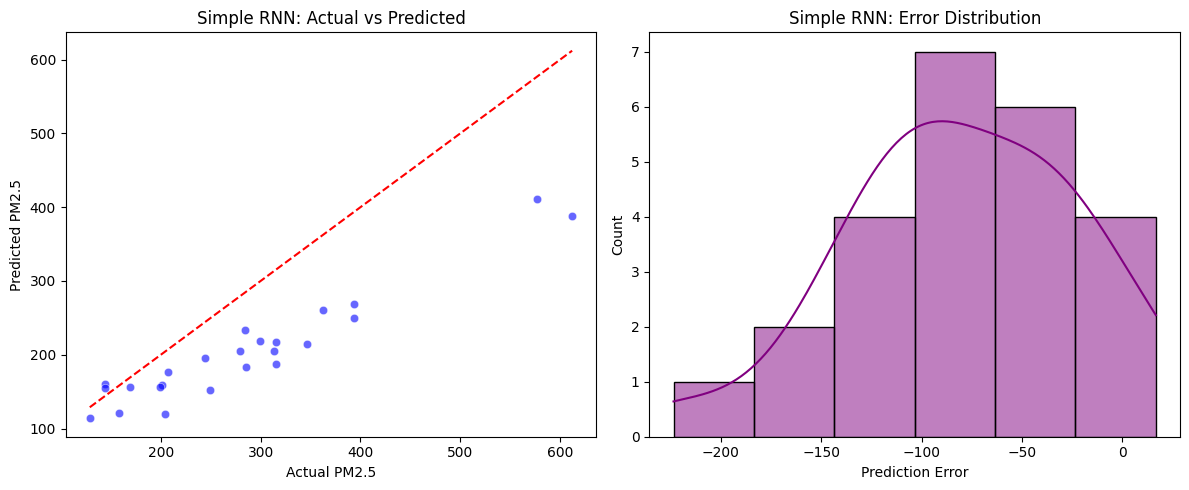

In [60]:
# Visualization
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.scatterplot(x=y_test, y=y_pred_rnn, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
plt.xlabel('Actual PM2.5')
plt.ylabel('Predicted PM2.5')
plt.title('Simple RNN: Actual vs Predicted')

plt.subplot(1,2,2)
sns.histplot(y_pred_rnn - y_test, kde=True, color='purple')
plt.xlabel('Prediction Error')
plt.title('Simple RNN: Error Distribution')

plt.tight_layout()
plt.show()

**2: LSTM (Long Short-Term Memory)**

In [61]:
# LSTM Model
lstm_model = Sequential()
lstm_model.add(LSTM(64, activation='tanh', input_shape=(X_train_rnn.shape[1], X_train_rnn.shape[2])))
lstm_model.add(Dense(1))

lstm_model.compile(optimizer='adam', loss='mse')

# Train
history_lstm = lstm_model.fit(X_train_rnn, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=0)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [62]:
# Predict
y_pred_lstm = lstm_model.predict(X_test_rnn).flatten()

# Evaluation
mae_lstm = mean_absolute_error(y_test, y_pred_lstm)
rmse_lstm = np.sqrt(mean_squared_error(y_test, y_pred_lstm))
r2_lstm = r2_score(y_test, y_pred_lstm)

print(f"LSTM:\nMAE: {mae_lstm:.2f}, RMSE: {rmse_lstm:.2f}, R2: {r2_lstm:.2f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 271ms/step
LSTM:
MAE: 156.47, RMSE: 192.62, R2: -1.53


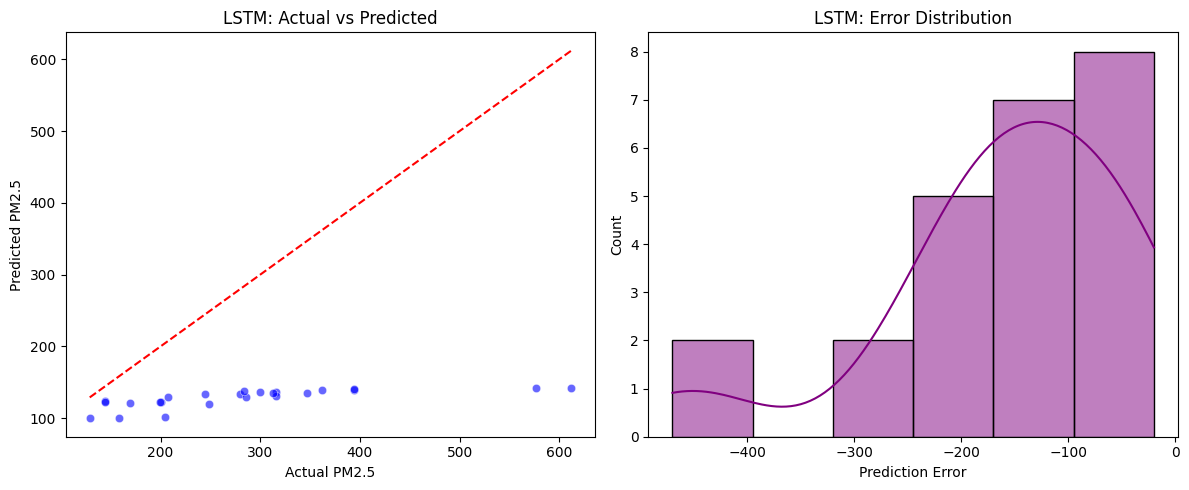

In [63]:
# Visualization
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.scatterplot(x=y_test, y=y_pred_lstm, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
plt.xlabel('Actual PM2.5')
plt.ylabel('Predicted PM2.5')
plt.title('LSTM: Actual vs Predicted')

plt.subplot(1,2,2)
sns.histplot(y_pred_lstm - y_test, kde=True, color='purple')
plt.xlabel('Prediction Error')
plt.title('LSTM: Error Distribution')

plt.tight_layout()
plt.show()

**3: Bi-Directional LSTM**

In [64]:
# Bi-LSTM Model
bilstm_model = Sequential()
bilstm_model.add(Bidirectional(LSTM(64, activation='tanh'), input_shape=(X_train_rnn.shape[1], X_train_rnn.shape[2])))
bilstm_model.add(Dense(1))

bilstm_model.compile(optimizer='adam', loss='mse')

# Train
history_bilstm = bilstm_model.fit(X_train_rnn, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=0)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [65]:
# Predict
y_pred_bilstm = bilstm_model.predict(X_test_rnn).flatten()

# Evaluation
mae_bilstm = mean_absolute_error(y_test, y_pred_bilstm)
rmse_bilstm = np.sqrt(mean_squared_error(y_test, y_pred_bilstm))
r2_bilstm = r2_score(y_test, y_pred_bilstm)

print(f"Bi-Directional LSTM:\nMAE: {mae_bilstm:.2f}, RMSE: {rmse_bilstm:.2f}, R2: {r2_bilstm:.2f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 305ms/step
Bi-Directional LSTM:
MAE: 99.37, RMSE: 135.83, R2: -0.26


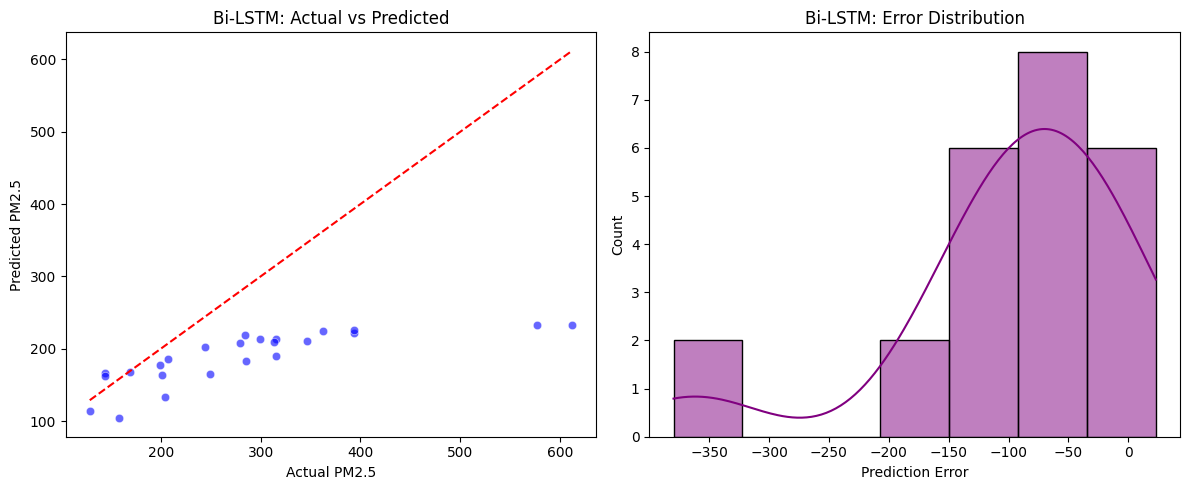

In [66]:
# Visualization
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.scatterplot(x=y_test, y=y_pred_bilstm, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
plt.xlabel('Actual PM2.5')
plt.ylabel('Predicted PM2.5')
plt.title('Bi-LSTM: Actual vs Predicted')

plt.subplot(1,2,2)
sns.histplot(y_pred_bilstm - y_test, kde=True, color='purple')
plt.xlabel('Prediction Error')
plt.title('Bi-LSTM: Error Distribution')

plt.tight_layout()
plt.show()

In [67]:
#COMPARING THE RESULTS OF ALL THE MODELS TESTED

In [68]:
# Results dictionary for all models
results = {
    'Model': [
        'Linear Regression', 'Ridge Regression', 'Decision Tree', 'Random Forest', 'XGBoost',
        'SVR', 'KNN', 'RNN', 'LSTM', 'Bi-directional LSTM'
    ],
    'MAE': [
        mae_lr, mae_ridge, mae_dt, mae_rf, mae_xgb,
        mae_svr, mae_knn, mae_rnn, mae_lstm, mae_bilstm
    ],
    'RMSE': [
        rmse_lr, rmse_ridge, rmse_dt, rmse_rf, rmse_xgb,
        rmse_svr, rmse_knn, rmse_rnn, rmse_lstm, rmse_bilstm
    ],
    'R²': [
        r2_lr, r2_ridge, r2_dt, r2_rf, r2_xgb,
        r2_svr, r2_knn, r2_rnn, r2_lstm, r2_bilstm
    ]
}

In [69]:
# Create a DataFrame to display the results
comparison_df = pd.DataFrame(results)

# Sort models based on RMSE (ascending) to find the best model
comparison_df_sorted = comparison_df.sort_values(by='RMSE', ascending=True)

# Display the sorted results
print(comparison_df_sorted)

                 Model         MAE        RMSE        R²
4              XGBoost   14.544412   18.905951  0.975624
3        Random Forest   20.340450   24.653722  0.958549
2        Decision Tree   31.227500   36.262593  0.910321
0    Linear Regression   34.432456   41.634011  0.881786
1     Ridge Regression   34.559737   41.795713  0.880866
6                  KNN   50.135250   63.075105  0.728675
7                  RNN   82.260718   97.966252  0.345474
9  Bi-directional LSTM   99.374257  135.828788 -0.258223
5                  SVR  145.135639  184.505994 -1.321640
8                 LSTM  156.467695  192.618716 -1.530293


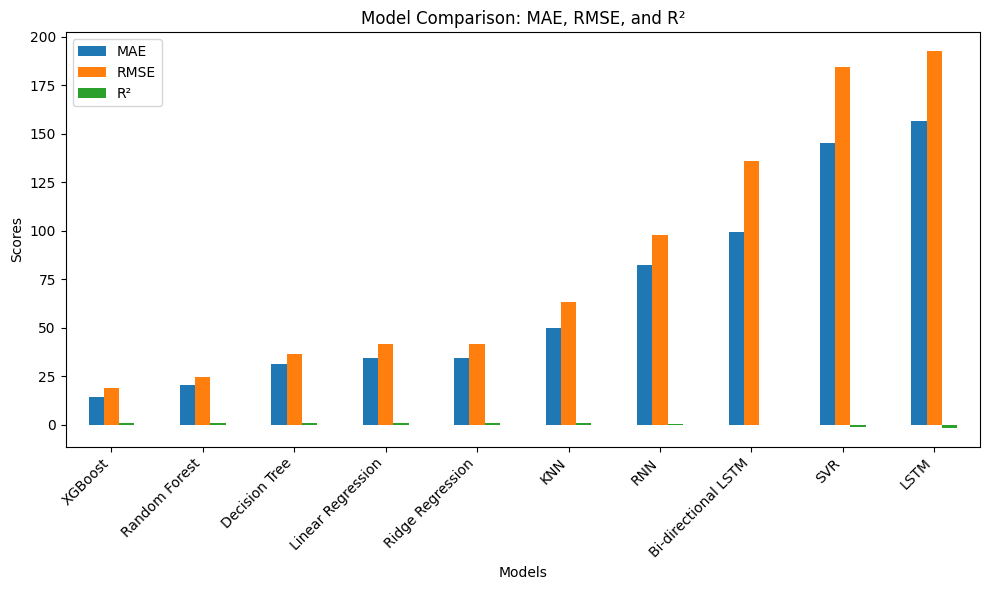

In [70]:
# Create a bar plot to visualize the comparison
fig, ax = plt.subplots(figsize=(10, 6))

comparison_df_sorted.set_index('Model')[['MAE', 'RMSE', 'R²']].plot(kind='bar', ax=ax)

plt.title('Model Comparison: MAE, RMSE, and R²')
plt.ylabel('Scores')
plt.xlabel('Models')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()

In [72]:
#FROM THE COMPARISON ABOVE IT IS EASILY CLEAR THAT THE XG-BOOST HAS PERFORMED CONSIDERABLY WELL AS COMPARED TO OTHERS
#SO WE,LL BE MOVING AHEAD WITH XG-BOOST